<a href="https://colab.research.google.com/github/IndervirBadial/Deregulation-affect-on-Transportation-Pricing/blob/main/ZFNetanimalclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the necessary libraries
import os
from os.path import exists
from pathlib import Path
from google.colab import drive
import random
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input,Add
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, ZeroPadding2D, Conv2D, BatchNormalization,MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
print("Successfully imported the libraries")

Importing all the necessary libraries
Successfully imported the libraries


In [ ]:
path = Path('/content/animals')
os.getcwd()
raw_path=path/'raw-img'

In [ ]:
#renaming the folders to have English descriptions, originally in Italian
folder_names = os.listdir(raw_path)

def rename_folder(current_name: str,
                  new_name: str,
                  path: Path) -> None:
    os.rename(os.path.join(path, current_name), os.path.join(path, new_name))

for folder in folder_names:
    current_folder = path / "raw-img"

    if folder == "cane":
        rename_folder(folder, "dog", current_folder)
    elif folder == "cavallo":
        rename_folder(folder, "horse", current_folder)
    elif folder == "elefante":
        rename_folder(folder, "elephant", current_folder)
    elif folder == "farfalla":
        rename_folder(folder, "butterfly", current_folder)
    elif folder == "gallina":
        rename_folder(folder, "chicken", current_folder)
    elif folder == "gatto":
        rename_folder(folder, "cat", current_folder)
    elif folder == "mucca":
        rename_folder(folder, "cow", current_folder)
    elif folder == "pecora":
        rename_folder(folder, "sheep", current_folder)
    elif folder == "ragno":
        rename_folder(folder, "spider", current_folder)
    elif folder == "scoiattolo":
        rename_folder(folder, "squirrel", current_folder)

print("Folders successfully renamed.")

classes = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

Folders successfully renamed.


Random image path: /content/animals/raw-img/cat/1017.jpeg
Random image class: cat


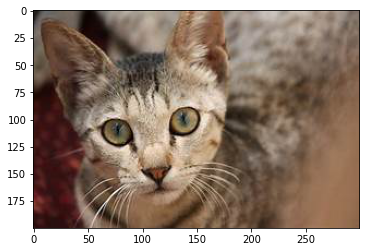

In [ ]:
#print a random image from the data set
def print_random_image(images_path: list,
                       seed=None) -> Image:
    if seed:
        random.seed(seed)

    random_image_path = random.choice(images_path)
    image_class = random_image_path.parent.stem
    image = Image.open(random_image_path)

    print(f"Random image path: {random_image_path}")
    print(f"Random image class: {image_class}")
    plt.figure()
    plt.imshow(image) 
    plt.show()



image_path_list = list(path.glob("raw-img/*/*"))
print_random_image(image_path_list)

In [ ]:
dataset = []
for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(raw_path, cl)
    for img in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img))
            #resized_img = cv2.resize(img, (32,32))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
        except Exception as e:
            pass

In [ ]:
#creates labels
x = []
y = []
for pic, label in dataset:
  x.append(pic)
  y.append(label)

In [ ]:
#convert to numpy arrays
x1 = np.array(x)
y1 = np.array(y)

print(type(x1), x1.shape)
print(type(y1), y1.shape)

<class 'numpy.ndarray'> (26179, 224, 224, 3)
<class 'numpy.ndarray'> (26179,)


butterfly : 2112
cat : 1668
chicken : 3098
cow : 1866
dog : 4863
elephant : 1446
horse : 2623
sheep : 1820
spider : 4821
squirrel : 1862


([<matplotlib.patches.Wedge at 0x7f1fbcecfee0>,
 [Text(1.0648586778945017, 0.27581877403972005, 'butterfly'),
  Text(0.8362986720410168, 0.7145659739607197, 'cat'),
  Text(0.3164342307572994, 1.0535033828161333, 'chicken'),
  Text(-0.32917956334200343, 1.04959078458129, 'cow'),
  Text(-0.985962037347783, 0.4877282654398954, 'dog'),
  Text(-1.0516051368461532, -0.32268659122867777, 'elephant'),
  Text(-0.7773272869527309, -0.778307322950714, 'horse'),
  Text(-0.27383762260898714, -1.06536986837617, 'sheep'),
  Text(0.5705980655634175, -0.9404349246892557, 'spider'),
  Text(1.0726531068831988, -0.2437525636661507, 'squirrel')])

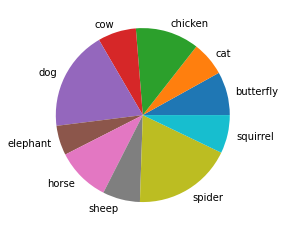

In [ ]:
unique, counts = np.unique(y1, return_counts=True)
frequencies=np.asarray((unique, counts)).T
for i in range(10):
  print(classes[i],':',frequencies[i][1])
plt.pie(counts,labels=classes)

In [ ]:
#define our training sets and display their shapes
x_trainfull, x_test, y_trainfull, y_test = train_test_split(x1,y1,test_size=0.15) #test set
x_train, x_val, y_train, y_val= train_test_split(x_trainfull,y_trainfull,test_size=0.15)  #training and validation                                           
print(x_trainfull.shape, x_test.shape, y_trainfull.shape, y_test.shape,x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(22252, 224, 224, 3) (3927, 224, 224, 3) (22252,) (3927,) (18914, 224, 224, 3) (3338, 224, 224, 3) (18914,) (3338,)


In [ ]:
#ZFNet
model=Sequential()
model.add(Conv2D(filters=96,kernel_size=(7,7),strides=(2,2),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(3,strides=2))

model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(MaxPooling2D(3,strides=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=384,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(3,strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096))
model.add(Dense(units=4096))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile our model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#show layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
#set epochs and batch_size
h_callback=model.fit(x_train, y_train, epochs=80, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/80
148/148 [==============================] - 38s 250ms/step - loss: 3.2273 - accuracy: 0.2678 - val_loss: 2.2283 - val_accuracy: 0.2798
Epoch 2/80
148/148 [==============================] - 38s 257ms/step - loss: 1.7143 - accuracy: 0.4165 - val_loss: 1.9396 - val_accuracy: 0.3385
Epoch 3/80
148/148 [==============================] - 43s 294ms/step - loss: 1.4824 - accuracy: 0.4964 - val_loss: 1.8243 - val_accuracy: 0.3925
Epoch 4/80
148/148 [==============================] - 40s 272ms/step - loss: 1.2807 - accuracy: 0.5687 - val_loss: 2.1744 - val_accuracy: 0.3631
Epoch 5/80
148/148 [==============================] - 41s 276ms/step - loss: 1.1388 - accuracy: 0.6174 - val_loss: 1.8488 - val_accuracy: 0.4371
Epoch 6/80
148/148 [==============================] - 38s 257ms/step - loss: 1.0269 - accuracy: 0.6520 - val_loss: 1.6501 - val_accuracy: 0.5180
Epoch 7/80
148/148 [==============================] - 38s 258ms/step - loss: 0.9284 - accuracy: 0.6918 - val_loss: 1.5007 - val_ac

In [ ]:
new_model = tf.keras.models.load_model('animal10final.hdf5')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 25, 25, 256)       614656    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
#model evaluation
score = model.evaluate(x_test, y_test)
print("Total loss on Testing set:", score[0])
print('Accuracy on Testing Set:', score[1])

123/123 [==============================] - 2s 19ms/step - loss: 2.0068 - accuracy: 0.7627
Total loss on Testing set: 2.0067903995513916
Accuracy on Testing Set: 0.7626687288284302


In [ ]:
#confusion matrix
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) #predicted classes on side, true classes on top

123/123 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       316
           1       0.73      0.62      0.67       232
           2       0.79      0.86      0.82       471
           3       0.76      0.57      0.65       300
           4       0.77      0.76      0.77       744
           5       0.61      0.71      0.65       195
           6       0.69      0.73      0.71       371
           7       0.60      0.74      0.66       295
           8       0.88      0.87      0.88       735
           9       0.75      0.68      0.72       268

    accuracy                           0.76      3927
   macro avg       0.74      0.74      0.74      3927
weighted avg       0.77      0.76      0.76      3927

[[258   0  11   2  10   2   4   4  20   5]
 [  3 143  12   1  36   4   5   7   7  14]
 [  4   2 403   1  19   5   8  12  13   4]
 [  2   0  10 170  28  11  41  32   4   2]
 [  1  24  21

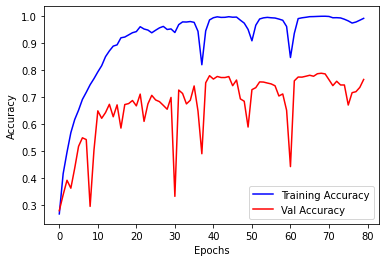

In [ ]:
#Training/validation accuracy over epochs
plt.plot(h_callback.history['accuracy'],"-b", label="Training Accuracy") #blue
plt.plot(h_callback.history['val_accuracy'],"-r", label="Val Accuracy") #red
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

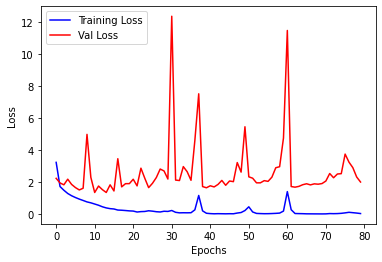

In [ ]:
#Training/validation loss over epochs
plt.plot(h_callback.history['loss'],"-b", label="Training Loss") #blue
plt.plot(h_callback.history['val_loss'],"-r", label="Val Loss") #red
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()